# Remapping degenerated network

When modelling wild type and degenerated networks, we want to be able to both remove and add synapses due to changes in dendritic and axonal morphologies. The synapses that are on unchanged branches should remain the same, removed branches will have their synapses removed, while added branches will get new synapses.

Preparation. 
Create a wild type network using Snudda.
Recreate the same network but with the modified morphologies (e.g. Parkinson's disease degenerated SPN dendrites, and growing FS axons).

Run this notebook on the two created networks.

In [1]:
original_network = "networks/pd0_3k_swap"
updated_network = "networks/pd2_3k_swap"
output_network =  "networks/pd2_3k_swap_output_network"

import os

original_network_file = os.path.join(original_network, "network-synapses.hdf5")
updated_network_file = os.path.join(updated_network, "network-synapses.hdf5")
output_network_file =  os.path.join(output_network, "network-synapses.hdf5")

original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0"
updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2"

# original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD0"
# updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD2"

In [2]:
from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=original_network_file,
                                             updated_network_file=updated_network_file,
                                             output_network_file=output_network_file,
                                             original_snudda_data_dir=original_snudda_data_dir,
                                             updated_snudda_data_dir=updated_snudda_data_dir)

Loading 3001 neurons with 1279476 synapses and 234 gap junctions
Loading 3001 neurons with 509015 synapses and 245 gap junctions


In [3]:
import cProfile
prof_file = "whysoslow.profile"
cProfile.runctx("swap.write_new_network_file()", None, locals(), filename=prof_file)
# swap.write_new_network_file()
swap.close()

Writing new network to networks/pd2_3k_swap_output_network/network-synapses.hdf5
Loading synapses into memory.
1000000 / 1279476
1279476 / 1279476
Processing neuron 0
No axon for neuron LTS_3 (99)
Processing neuron 100
No axon for neuron LTS_7 (159)
Processing neuron 200
No axon for neuron LTS_5 (205)
Processing neuron 300
No axon for neuron LTS_2 (321)
No axon for neuron ChIN_0 (354)
No axon for neuron ChIN_0 (355)
No axon for neuron LTS_3 (393)
Processing neuron 400
Processing neuron 500
No axon for neuron ChIN_0 (529)
No axon for neuron ChIN_0 (530)
No axon for neuron ChIN_0 (556)
No axon for neuron ChIN_0 (590)
Processing neuron 600
No axon for neuron ChIN_0 (621)
No axon for neuron ChIN_0 (686)
Processing neuron 700
No axon for neuron ChIN_0 (746)
No axon for neuron ChIN_0 (747)
No axon for neuron LTS_7 (785)
Processing neuron 800
No axon for neuron ChIN_0 (899)
Processing neuron 900
Processing neuron 1000
No axon for neuron ChIN_0 (1004)
Processing neuron 1100
Processing neuron 1

In [4]:
import pstats
from pstats import SortKey
p = pstats.Stats(prof_file)
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats(100)

Thu Nov  3 16:41:12 2022    whysoslow.profile

         64224442 function calls (63055013 primitive calls) in 80.866 seconds

   Ordered by: cumulative time
   List reduced from 326 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   80.866   80.866 {built-in method builtins.exec}
        1    0.000    0.000   80.866   80.866 <string>:1(<module>)
        1    0.354    0.354   80.866   80.866 swap_to_degenerated_morphologies.py:77(write_new_network_file)
        1    0.786    0.786   78.531   78.531 swap_to_degenerated_morphologies_extended.py:210(filter_synapses)
   388565    4.220    0.000   47.906    0.000 swap_to_degenerated_morphologies.py:272(filter_synapses_helper)
   388565    3.857    0.000   30.703    0.000 swap_to_degenerated_morphologies.py:307(filter_axonal_synapses_helper)
   628190    7.485    0.000   16.198    0.000 {method 'query' of 'scipy.spatial._ckdtree.cKDTree' objects}
   299780    

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0 from networks/pd0_3k_swap/network-config.json
Loading 3001 neurons with 1279476 synapses and 234 gap junctions
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2 from networks/pd2_3k_swap_output_network/network-synapses.hdf5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Loading 3001 neurons with 500141 synapses and 234 gap junctions
Synapse coordinates mismatch [[0.004632 0.003849 0.007593]] vs [[0.00465607 0.00385959 0.00762979]] (distances [4.52225674e-05] with allowed max_dist = 1e-05)
Figure written: networks/pd2_3k_swap_output_network/figures/input-to-1-dSPN_0-and-internal-synapses.png


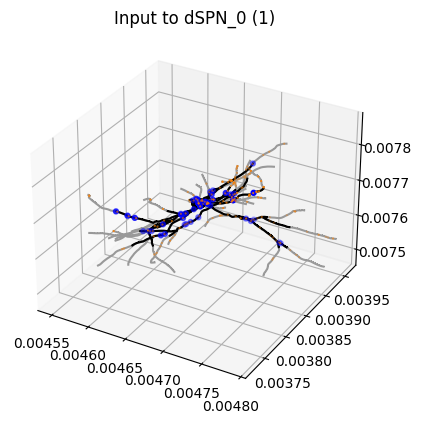

In [5]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=original_network,
                      degenerated_network_path=output_network)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)

In [6]:
check_type="Pre"
check_id = 500
cmd_str1 = f"snudda_load {original_network}/network-synapses.hdf5 --list{check_type} {check_id}"
cmd_str2 = f"snudda_load {updated_network}/network-synapses.hdf5 --list{check_type} {check_id}"
cmd_str3 = f"snudda_load {output_network}/network-synapses.hdf5 --list{check_type} {check_id}"

os.system(cmd_str1)
os.system(cmd_str2)
os.system(cmd_str3)

Loading 3001 neurons with 1279476 synapses and 234 gap junctions
List neurons pre-synaptic to neuronID = 500 (dSPN_11)
The neuron receives 643 synapses
13 : dSPN_20 (3 synapses)
73 : dSPN_26 (3 synapses)
215 : dSPN_18 (4 synapses)
221 : dSPN_33 (3 synapses)
271 : dSPN_28 (4 synapses)
292 : dSPN_7 (2 synapses)
301 : dSPN_26 (2 synapses)
327 : dSPN_13 (1 synapses)
341 : iSPN_15 (3 synapses)
349 : iSPN_30 (3 synapses)
369 : dSPN_30 (3 synapses)
372 : dSPN_34 (3 synapses)
386 : iSPN_21 (4 synapses)
400 : dSPN_8 (1 synapses)
404 : dSPN_14 (2 synapses)
446 : dSPN_29 (3 synapses)
457 : iSPN_20 (2 synapses)
463 : iSPN_28 (3 synapses)
467 : FS_0 (5 synapses)
473 : dSPN_12 (4 synapses)
481 : iSPN_3 (2 synapses)
482 : iSPN_5 (3 synapses)
498 : dSPN_3 (4 synapses)
501 : dSPN_12 (3 synapses)
503 : dSPN_15 (3 synapses)
504 : dSPN_16 (4 synapses)
509 : dSPN_31 (3 synapses)
510 : dSPN_33 (5 synapses)
516 : iSPN_13 (3 synapses)
524 : iSPN_27 (3 synapses)
525 : iSPN_29 (5 synapses)
536 : dSPN_8 (5 synap

0

Loading 3001 neurons with 1279476 synapses and 234 gap junctions
Loading 3001 neurons with 500141 synapses and 234 gap junctions
Added: 8, removed: 105, kept: 20


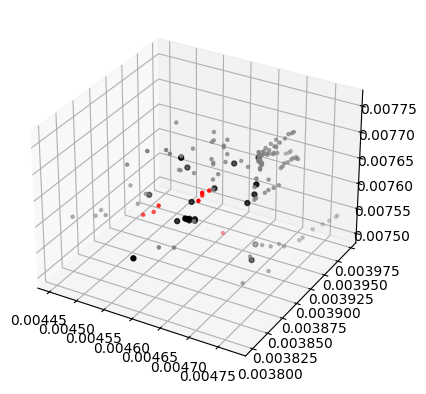

(<Figure size 640x480 with 1 Axes>, <Axes3DSubplot:>)

In [7]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=original_network, degenerated_network_path=output_network, neuron_id=2)
pdg.plot_synapses()

In [8]:
cmd_str1 = f"snudda_load {original_network}/network-synapses.hdf5 --countSyn"
cmd_str2 = f"snudda_load {updated_network}/network-synapses.hdf5 --countSyn"
cmd_str3 = f"snudda_load {output_network}/network-synapses.hdf5 --countSyn"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading 3001 neurons with 1279476 synapses and 234 gap junctions
ChIN -> LTS: 520 synapses
ChIN -> dSPN: 8366 synapses
ChIN -> iSPN: 8914 synapses
FS -> FS: 515 synapses
FS -> LTS: 56 synapses
FS -> dSPN: 42731 synapses
FS -> iSPN: 25840 synapses
LTS -> ChIN: 645 synapses
LTS -> dSPN: 2271 synapses
LTS -> iSPN: 1728 synapses
dSPN -> ChIN: 368 synapses
dSPN -> dSPN: 261642 synapses
dSPN -> iSPN: 66282 synapses
iSPN -> ChIN: 447 synapses
iSPN -> dSPN: 280101 synapses
iSPN -> iSPN: 579050 synapses

PD2
Loading 3001 neurons with 509015 synapses and 245 gap junctions
ChIN -> LTS: 484 synapses
ChIN -> dSPN: 2214 synapses
ChIN -> iSPN: 3480 synapses
FS -> FS: 865 synapses
FS -> LTS: 109 synapses
FS -> dSPN: 41049 synapses
FS -> iSPN: 62980 synapses
LTS -> ChIN: 696 synapses
LTS -> dSPN: 682 synapses
LTS -> iSPN: 581 synapses
dSPN -> ChIN: 372 synapses
dSPN -> dSPN: 75647 synapses
dSPN -> iSPN: 22981 synapses
iSPN -> ChIN: 450 synapses
iSPN -> dSPN: 76176 synapses
iSPN -> iSPN: 220249 synap

0